In [1]:
import chatbot.todaybeer
import chatbot.ideal_worldcup
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
import re

np.set_printoptions(suppress=True)

tokenizer load


Using TensorFlow backend.


keras load
pandas, numpy load
model load
vocabulary load
weight load complete
rawdata load complete
vocabulary load complete
getting embedding vector complete


In [2]:
chat = chatbot.todaybeer.todaybeer()
b = chat.model.layers[2].get_weights()
worldcup = chatbot.ideal_worldcup.ideal_worldcup()
graphs = chatbot.todaybeer.graphs

In [6]:
chat.model.layers[2].get_weights()[0][28309]

array([ 0.11619139, -0.03223932, -0.13765496,  0.0392381 ,  0.30855593,
       -0.18078072, -0.19366895,  0.38427758, -0.2898759 ,  0.05615221,
        0.1425526 , -0.03614203, -0.17471075,  0.2829967 , -0.17892604,
       -0.44484016,  0.19917655,  0.18769717, -0.31648323,  0.06088362,
       -0.216054  , -0.16546066,  0.22500381, -0.05820832, -0.26080823,
        0.17872992,  0.06365944, -0.27192003,  0.11823887, -0.31506154,
        0.02223903,  0.16935611,  0.09781997, -0.01427367,  0.13516119,
        0.21051465,  0.07660437,  0.08483136,  0.2983551 ,  0.11795395,
        0.09356359, -0.07375648,  0.36279368, -0.07737701,  0.12978347,
       -0.08913213,  0.14133033,  0.25421265, -0.07071247,  0.11122555,
       -0.34869084,  0.18449354,  0.45665893, -0.19660626, -0.19629578,
       -0.0102265 , -0.10217153, -0.00349594,  0.28967467, -0.29073724,
       -0.3827352 ,  0.37239555,  0.05371043,  0.40354973, -0.17308192,
        0.3077922 ,  0.12790798,  0.0464852 ,  0.16871276,  0.03

In [7]:
user

array([[ 0.11619139, -0.03223932, -0.13765496,  0.0392381 ,  0.30855593,
        -0.18078072, -0.19366895,  0.38427758, -0.2898759 ,  0.05615221,
         0.1425526 , -0.03614203, -0.17471075,  0.2829967 , -0.17892604,
        -0.44484016,  0.19917655,  0.18769717, -0.31648323,  0.06088362,
        -0.216054  , -0.16546066,  0.22500381, -0.05820832, -0.26080823,
         0.17872992,  0.06365944, -0.27192003,  0.11823887, -0.31506154,
         0.02223903,  0.16935611,  0.09781997, -0.01427367,  0.13516119,
         0.21051465,  0.07660437,  0.08483136,  0.2983551 ,  0.11795395,
         0.09356359, -0.07375648,  0.36279368, -0.07737701,  0.12978347,
        -0.08913213,  0.14133033,  0.25421265, -0.07071247,  0.11122555,
        -0.34869084,  0.18449354,  0.45665893, -0.19660626, -0.19629578,
        -0.0102265 , -0.10217153, -0.00349594,  0.28967467, -0.29073724,
        -0.3827352 ,  0.37239555,  0.05371043,  0.40354973, -0.17308192,
         0.3077922 ,  0.12790798,  0.0464852 ,  0.1

In [5]:
#이상형 월드컵

user = worldcup.ideal_choice(iteration = 6)[np.newaxis,:]

베를리너 호가든
응답?1
베를리너 버드와이저
응답?1
베를리너 코젤
응답?1
베를리너 하이네켄
응답?1
베를리너 헤페
응답?1
베를리너 칭따오
응답?1
베를리너 스텔라
응답?1


In [7]:
rawdata = pd.read_csv("beer.csv",engine="python",encoding="cp949")

target = rawdata['target']

text = rawdata["reviews"]

In [8]:
shuffled = text.sample(frac=1)

In [9]:
ratebeers = rawdata[rawdata["source"] == "r"].reset_index()

In [10]:
ratebeers[ratebeers.index == 2000]

,index,reviews,source,target
2000,7843,다양한 음식에 딱 맞으며 스시도 ??잘 어울립니다.,r,삿포로


In [13]:
listed = list()
error = list()

for i in target:
    try:
        listed.append(chatbot.todaybeer.vocabulary[i])
    except : 
        error.append(i)
print(pd.unique(error))

[]


In [12]:
#타겟도 숫자를 맞춰준다.
names = re.compile("[맥주]+")

for i,j in target.items():
    if j.endswith("맥주"):
        target[i] = names.sub("",j)
    else : pass

names = re.compile("[베를리너]+")

for i,j in target.items():
    if j.endswith("필스너"):
        target[i] = names.sub("",j)
    else : pass

names = re.compile("[우르켈]+")

for i,j in target.items():
    if j.endswith("우르켈"):
        target[i] = names.sub("",j)
    else : pass

In [20]:
# 리턴값을 받는다. [0]부분 확률값, 유저 특성 부분 확률값

return_classes = chat.engine("피자랑 어울리는 맥주",0,user,intention=True)

감정판단


In [21]:
return_classes

5

In [22]:
chat.return_classes

array([[[0.02694652, 0.00002943, 0.40078983, 0.00000231, 0.00003164,
         0.23553288, 0.00003262, 0.00000096, 0.00386478, 0.00947668,
         0.00104589, 0.00889144, 0.0000009 , 0.08452702, 0.00000119,
         0.17649189, 0.03531025, 0.00001592, 0.01469173, 0.00009531,
         0.00000963, 0.00221113],
        [0.01108777, 0.00003703, 0.15178479, 0.00000225, 0.00005556,
         0.58159316, 0.00000626, 0.00000009, 0.03944706, 0.00248046,
         0.00230553, 0.00205308, 0.00000011, 0.00674294, 0.00000012,
         0.13999942, 0.06057652, 0.00000297, 0.00165438, 0.00001057,
         0.00000112, 0.00015886]]], dtype=float32)

In [327]:
np.argmax(chat.return_classes[0][0] * chat.return_classes[0][1])

16

In [328]:
np.argmax(chat.return_classes[0][0])

13

In [329]:
np.argmax(chat.return_classes[0][1])

16

In [258]:
for i in target.unique():
    try:
        listed.append(chatbot.todaybeer.vocabulary[i])
    except : pass

(array([2954.,  111., 2602.,  396.,   31., 1381., 1588., 2289.,  677.,
        3909.,  372., 1515., 3591., 1934., 3069., 4300., 3649., 3121.,
        1186., 2359., 2012., 4819., 6658., 2771., 3803., 6759.]),
 array([ 0.        ,  0.96153846,  1.92307692,  2.88461538,  3.84615385,
         4.80769231,  5.76923077,  6.73076923,  7.69230769,  8.65384615,
         9.61538462, 10.57692308, 11.53846154, 12.5       , 13.46153846,
        14.42307692, 15.38461538, 16.34615385, 17.30769231, 18.26923077,
        19.23076923, 20.19230769, 21.15384615, 22.11538462, 23.07692308,
        24.03846154, 25.        ]),
 <a list of 26 Patch objects>)

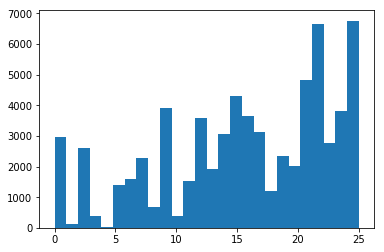

In [235]:
##타겟 변수들의 분포를 살펴본다.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
target_encoded = le.fit_transform(target)

plt.hist(target_encoded,bins=26)

## 예측은 다음과 같이 진행된다.

In [18]:
##리턴값을 받는다. [0]부분 확률값, 유저 특성 부분 확률값

return_classes = chat.engine("회식 할때 먹을 맥주",48891,user)

In [66]:
#chat.return_classes 메소드를 입력하면, 최종 출력된 확률값을 볼 수 있다.
print("문장 특성 부분과 유저 특성 부분의 확률 출력값")
print(chat.return_classes[0][0])
print(chat.return_classes[0][1])
print("==================================")
print("문장 특성 부분과 유저 특성 부분의 하다마드곱값")
print((chat.return_classes[0][1]+0.00000001) * (chat.return_classes[0][0]+0.00000001))
print("==================================")
print("최대 확률 출력값:",np.argmax((chat.return_classes[0][1]+0.00000001) * (chat.return_classes[0][0]+0.00000001)))

문장 특성 부분과 유저 특성 부분의 확률 출력값
[0.03775235 0.00121141 0.07909046 0.01546949 0.02538682 0.03675074
 0.04496624 0.01941418 0.01092358 0.03847869 0.06944335 0.07985287
 0.04253636 0.14058863 0.00786114 0.01369292 0.03589598 0.01908605
 0.16535383 0.05393985 0.01363675 0.04866837]
[0.00000013 0.00000037 0.00000119 0.00008723 0.00000002 0.0000005
 0.00000581 0.00003384 0.         0.0000057  0.0000001  0.00000195
 0.00000502 0.00024923 0.00002296 0.00000225 0.00002858 0.99920386
 0.0003285  0.00000001 0.00002027 0.00000248]
문장 특성 부분과 유저 특성 부분의 하다마드곱값
[0.00000001 0.         0.00000009 0.00000135 0.         0.00000002
 0.00000026 0.00000066 0.         0.00000022 0.00000001 0.00000016
 0.00000021 0.00003504 0.00000018 0.00000003 0.00000103 0.01907086
 0.00005432 0.         0.00000028 0.00000012]
최대 확률 출력값: 17


## 연구 결과

### 유저 특성 벡터와 맥주 벡터의 유사성과 예측 확률의 상관관계

In [24]:
## 크롬바흐(46120)의 임베딩 벡터와, 이 유저의 특성벡터와 코싸인 유사도는 매우 높다
## 그 코싸인 유사도 만큼 알고리즘도 높은 확률(0.9981)로 크롬바흐(14번)을 예측했다.

print("코싸인 유사도:",np.dot(user,b[0][46120])/np.dot(np.linalg.norm(user),np.linalg.norm(b[0][46120])))
print("리턴 확률값")
print("문장 판단 디코더:",chat.return_classes[0][0])
print("유저 판단 디코더:",chat.return_classes[0][1])
print("유저 특성 최다확률:",np.argmax(chat.return_classes[0][1]))

코싸인 유사도: [0.99307597]
리턴 확률값
문장 판단 디코더: [0.00972732 0.00070677 0.01962178 0.02076139 0.03370296 0.01456601
 0.07030506 0.0414014  0.00342293 0.04701624 0.03703387 0.09414103
 0.09772133 0.06903113 0.02108245 0.00469027 0.01243077 0.05395192
 0.19508913 0.04812561 0.03818664 0.06728408]
유저 판단 디코더: [0.00018926 0.00052987 0.00000025 0.00050486 0.00011802 0.00000087
 0.00017216 0.0000198  0.00000227 0.00000044 0.0000063  0.00016379
 0.00001871 0.00000151 0.99819654 0.00000002 0.0000094  0.00002417
 0.00000005 0.000004   0.00003766 0.0000001 ]
유저 특성 최다확률: 14


In [36]:
return_classes = chat.engine("회식 할때 먹을 맥주",48891,user)

In [37]:
chat.return_classes

array([[[0.00000001, 0.00003622, 0.00001238, 0.00000676, 0.000019  ,
         0.00003187, 0.00000013, 0.00000009, 0.00000169, 0.0000051 ,
         0.00009561, 0.00002934, 0.00000324, 0.00000058, 0.00000167,
         0.00000509, 0.00000025, 0.00000001, 0.00000027, 0.9997507 ,
         0.00000003, 0.        ],
        [0.00000011, 0.00006313, 0.00000007, 0.00127065, 0.00374139,
         0.00000485, 0.00049581, 0.00022693, 0.00000023, 0.000123  ,
         0.00114314, 0.02473695, 0.00387177, 0.0000009 , 0.35949308,
         0.00000004, 0.0000002 , 0.00004833, 0.00003434, 0.60464126,
         0.00010334, 0.0000004 ]]], dtype=float32)

### 0디코더와 유저 디코더에 서로 엇갈려서 입력

In [63]:
return_classes = chat.engine("라거맥주 좋은거 추천해줘",0,user)

## 0 디코더에 유저특성을, 유저 디코더에 0특성을 집어넣으면 
##두 디코더의 출력 확률값이 똑같이 나온다.
## 즉, 애초에 이렇게 할 필요가 없다. 의미가 없다.

chat.return_classes

array([[[0.09040125, 0.00058181, 0.04554254, 0.014595  , 0.01890278,
         0.0220978 , 0.01807117, 0.00854406, 0.01312704, 0.03452918,
         0.03994683, 0.05081095, 0.00731637, 0.38773006, 0.00618265,
         0.02128237, 0.05010167, 0.01341403, 0.06459481, 0.0432957 ,
         0.01238168, 0.03655035],
        [0.21076252, 0.00039531, 0.07187243, 0.00032826, 0.00640488,
         0.10614787, 0.00009287, 0.00001809, 0.12265224, 0.0002526 ,
         0.00218574, 0.00046569, 0.0000574 , 0.33345833, 0.00001847,
         0.01630218, 0.12062931, 0.00008249, 0.00032559, 0.00316997,
         0.00053472, 0.00384305]]], dtype=float32)

In [58]:
return_classes = chat.engine("피자랑 같이 먹기 좋은 맥주",0,user)

## 0 디코더에 유저특성을, 유저 디코더에 0특성을 집어넣으면 
##두 디코더의 출력 확률값이 똑같이 나온다.
## 즉, 애초에 이렇게 할 필요가 없다. 의미가 없다.

chat.return_classes

array([[[0.11050285, 0.00061556, 0.03201429, 0.00836592, 0.03885423,
         0.03821592, 0.00919879, 0.00533061, 0.01532542, 0.00892897,
         0.02248298, 0.04246902, 0.00553386, 0.44556943, 0.00424813,
         0.01220469, 0.05620429, 0.01055162, 0.03138063, 0.01491176,
         0.02382565, 0.06326542],
        [0.20054731, 0.00054663, 0.04550146, 0.00020883, 0.01188486,
         0.17337775, 0.00004117, 0.00000738, 0.12735362, 0.00002889,
         0.00071842, 0.00030386, 0.00003392, 0.29182634, 0.00001267,
         0.00591544, 0.1361328 , 0.00005265, 0.00007928, 0.00059413,
         0.00094101, 0.00389155]]], dtype=float32)

In [59]:
np.argmax(chat.return_classes[0][1])

13

In [60]:
np.argmax(chat.return_classes[0][0])

13

In [49]:
user = b[0][51001][np.newaxis,:]

In [55]:
return_classes = chat.engine("라거 맥주 추천 부탁해",0,user,intention=True)

## 0 디코더에 0특성을, 유저 디코더에 유저특성을 집어넣으면 
##두 디코더의 출력은 다르게 나온다.
## 즉, 0디코더는 범용적인 특성을, 유저 디코더는 유저 유형에 대한 특성을 과적합한다.
## 이는 0디코더는 역전파를 수행할 때 범용적인 출력값을 내는것에 비해
## 유저 디코더는 역전파를 수행할 때 실제 어텐션 매커니즘의 알고리즘을 작동 시켜서
## 0디코더와 인코더를 업데이트 시키기 때문이라고 생각된다.

chat.return_classes

감정판단


array([[[0.18805876, 0.00007956, 0.02860612, 0.00387865, 0.00418556,
         0.00272237, 0.00478814, 0.00877686, 0.00762044, 0.01690884,
         0.02997493, 0.00889718, 0.00042836, 0.46006006, 0.00112079,
         0.12568633, 0.03655015, 0.00354258, 0.02009127, 0.00721392,
         0.00209283, 0.03871639],
        [0.11283288, 0.00011283, 0.06053126, 0.00005551, 0.00358557,
         0.01423993, 0.00000784, 0.00002494, 0.08210109, 0.00004185,
         0.00336939, 0.00006441, 0.00000199, 0.31218532, 0.00000154,
         0.37993893, 0.02742556, 0.00000322, 0.00002141, 0.00175247,
         0.00001748, 0.0016846 ]]], dtype=float32)

In [56]:
np.argmax(chat.softmax(chat.return_classes[0][1] + chat.return_classes[0][0]))

13

In [57]:
np.argmax(chat.return_classes[0][0] * chat.return_classes[0][1])

13

In [58]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

In [59]:
a = chat.return_classes[0][1] + chat.return_classes[0][0]

In [60]:
np.argmax(softmax(a))

13

## 답변 분포 확인

In [17]:
#타겟 변수의 색인사전 검색

for i in target.unique():
    print(i,chatbot.todaybeer.vocabulary[i])

듀벨 22664
기네스 18082
버드와이저 28053
필스 48672
블랑 29745
산미구엘 30746
삿포로 30969
스텔라 33308
아사히 34781
칭따오 45240
카스 45334
칼스버그 45466
코로나 45744
코젤 45819
크롬바커 46120
필스너 48673
하이네켄 48863
하이트 48891
베를리너 28309
헤페 49802
호가든 49981
필라이트 48647


In [168]:
DataFrame(user).to_csv("임시.csv")

In [249]:
user = pd.read_csv("이상형월드컵.csv",engine="python",encoding="utf-8")
user = user["코젤"][np.newaxis,:]

In [79]:
len(chatbot.todaybeer.vocabulary)

51072

In [237]:
return_classes = chat.engine("회식할 때 마시면 좋은 맥주",0,user,intention=True)

감정판단


In [140]:
## 최대 확률 출력값을 분포로 확인해보기 위해 반복문을 돌린다.

listed = list()


for i in range(0,len(chatbot.todaybeer.vocabulary)):
    with graphs.as_default():
        user = b[0][i][np.newaxis,:]
        return_classes = chat.engine("회식할 때 좋은 맥주",0,user)
        listed.append(return_classes)
        if i % 1000 == 0:
            print(i)
        else : pass

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000


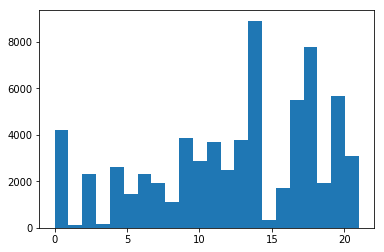

In [135]:
final = plt.hist(listed,bins=22)
index = pd.read_csv("타겟.csv",engine='python',names=["타겟"])
DataFrame(final[0],index=np.array(index["타겟"])).to_csv("유저특성 - 크롬바커.csv",encoding="cp949")

In [129]:
?plt.plot

## 유저 특성을 고정시키고, 문장을 순회시킨 분포

(array([ 2865.,   121.,  2411.,   184.,  1633.,  1610.,  2163.,  1772.,
         1128.,  3810., 12871.,  3512.,  2454.,  4054.,  1501.,   475.,
         1459.,  5507.,  8116.,  1216.,  3641.,  5353.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

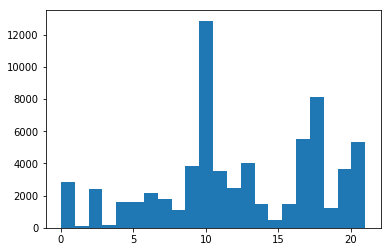

In [25]:
## 데이터셋 문장 60000건 순회, 유저특성 = 카스

plt.hist(listed,bins=22)

In [35]:
pd.unique(listed)

array([ 4,  0, 14, 11,  6, 15, 10, 18,  8,  2, 17,  9, 20, 19, 13,  7, 21,
       12,  5, 16,  3,  1], dtype=int64)

(array([4204.,  101., 2323.,  179., 2635., 1473., 2301., 1921., 1100.,
        3881., 2890., 3689., 2500., 3757., 8910.,  357., 1692., 5483.,
        7781., 1911., 5688., 3080.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

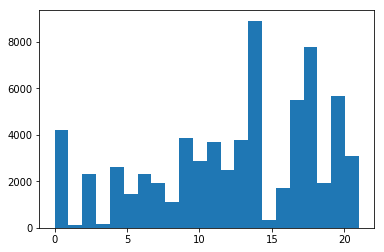

In [31]:
## 데이터셋 문장 60000건 순회, 유저특성 = 크롬바커

plt.hist(listed,bins=22)

(array([    7.,    60., 27435.,     1.,  1039.,     3.,     7.,     1.,
            3.,  1998.,     0.,     0.,     0.,  2270.,     0.,     0.,
         7055.,     0.,     0.,     0.,     0.,   121.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

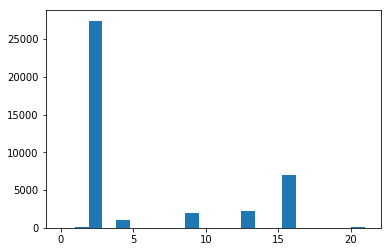

In [222]:
#치킨이랑 같이 먹으면 좋은 맥주

plt.hist(listed,bins=22)

(array([    3.,   145.,     5.,     1.,  2919.,    52.,    36.,     1.,
            1.,  1893.,     0.,     0.,     0.,  2111.,    14.,     0.,
          170.,     0.,     0.,     1., 26004.,  6644.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

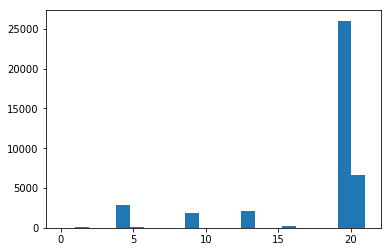

In [224]:
#피자랑 같이 먹으면 좋은 맥주

plt.hist(listed,bins=22)

(array([    4.,    14.,  6311.,     1.,   762.,    90.,   287.,     1.,
           75., 14323.,    16.,     0.,   184., 12426.,     0.,    26.,
          942.,     0.,     0.,  4312.,    13.,   213.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

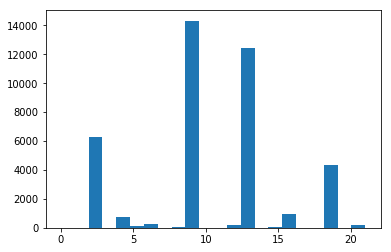

In [226]:
#회식할 때 좋은 맥주

plt.hist(listed,bins=22)

(array([ 5319.,     1., 22580.,     3.,   101., 10693.,     6.,     1.,
         4368.,    16.,   266.,    23.,     2.,  5656.,     2.,   171.,
         1354.,    11.,    89.,   103.,     1.,   306.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

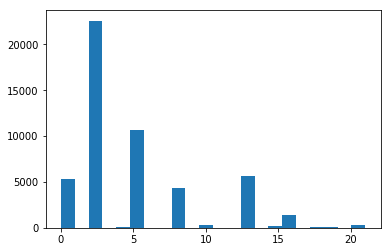

In [141]:
#회식할 때 좋은 맥주

plt.hist(listed,bins=22)

(array([ 5414.,     1., 22146.,     3.,   119., 10294.,     7.,     1.,
         4380.,    19.,   279.,    27.,     2.,  6197.,     2.,   181.,
         1422.,    16.,   102.,   118.,     2.,   340.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

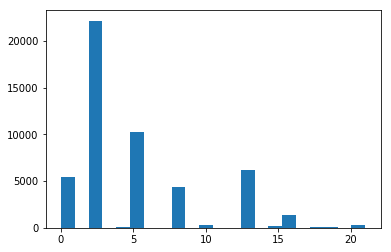

In [139]:
##회식할 때 마시면 좋은 맥주

plt.hist(listed,bins=22)

(array([    3.,    11.,  3936.,     1.,  1002.,   120.,   267.,     1.,
           44., 16452.,    30.,     0.,   191., 12022.,     0.,    35.,
          550.,     0.,     1.,  4772.,    51.,   511.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

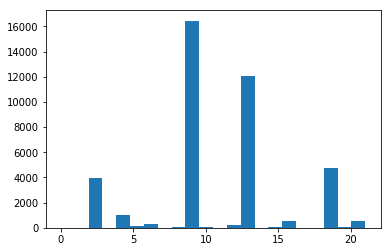

In [239]:
#회식할 때 맥주

plt.hist(listed,bins=22)

(array([    2.,     7.,  2491.,     1.,   768.,    48.,   121.,     1.,
           14.,  9006.,    15.,     0.,   169., 22309.,     0.,    27.,
          405.,     0.,     8.,  3743.,   174.,   691.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

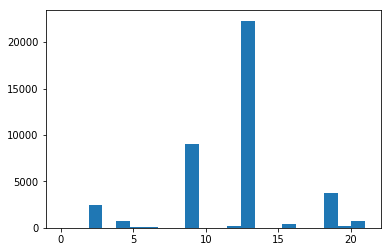

In [243]:
#회식 좋은

plt.hist(listed,bins=22)

(array([    6.,    22.,  9492.,     1.,  3271.,   267.,   138.,     1.,
           50., 11719.,    50.,     0.,    23.,  8384.,     0.,   140.,
         1282.,     0.,     0.,  4281.,    98.,   775.]),
 array([ 0.        ,  0.95454545,  1.90909091,  2.86363636,  3.81818182,
         4.77272727,  5.72727273,  6.68181818,  7.63636364,  8.59090909,
         9.54545455, 10.5       , 11.45454545, 12.40909091, 13.36363636,
        14.31818182, 15.27272727, 16.22727273, 17.18181818, 18.13636364,
        19.09090909, 20.04545455, 21.        ]),
 <a list of 22 Patch objects>)

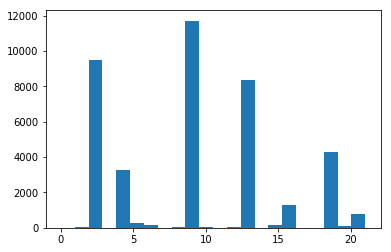

In [241]:
#회식

plt.hist(listed,bins=22)

## 문장은 "카스", 유저 특성은 "하이네켄"인 경우

In [142]:
#카스 - 하이네켄(48863)
## 문장판독부분은 "카스(10번)"를 가리키며, 맥주 판독 부분은 하이네켄(18)을 가리킨다.

#chat.return_classes[0]

array([[0.00009169, 0.00000009, 0.01063089, 0.00000178, 0.00053515,
        0.00004924, 0.00050246, 0.00000139, 0.00271594, 0.0012902 ,
        0.7000193 , 0.2779783 , 0.00000383, 0.00000003, 0.00001634,
        0.00001502, 0.        , 0.00002068, 0.00526216, 0.00086116,
        0.00000098, 0.00000331],
       [0.00000003, 0.        , 0.000005  , 0.        , 0.00000001,
        0.        , 0.00000029, 0.00000086, 0.00000022, 0.00001413,
        0.00149489, 0.00015529, 0.00000009, 0.00000014, 0.00000001,
        0.0000002 , 0.        , 0.00000461, 0.9982942 , 0.00002817,
        0.00000011, 0.00000176]], dtype=float32)

## 유저 판단 부분 - 문장판독부분의 확률값은 변하지 않고, 맥주 판단 부분의 확률값만 변한다.

In [118]:
#치킨이랑 잘 어울리는 맥주 - 카스(45334)
## 문장판독부분의 확률값은 변하지 않고, 맥주 판단 부분의 확률값(카스,10번)만 변한다.

#chat.return_classes[0]

array([[0.05090127, 0.00649421, 0.09186549, 0.00389752, 0.05419413,
        0.04520196, 0.04804324, 0.00945126, 0.03293797, 0.16145608,
        0.07490661, 0.02492157, 0.01956567, 0.08136762, 0.01397789,
        0.03402385, 0.02473229, 0.01568498, 0.05094609, 0.05822654,
        0.01971523, 0.07748856],
       [0.00000568, 0.        , 0.00000061, 0.00000435, 0.00003774,
        0.00000018, 0.        , 0.00000101, 0.        , 0.        ,
        0.        , 0.00000038, 0.00000043, 0.0000146 , 0.00000121,
        0.00000015, 0.00017504, 0.00000095, 0.00000008, 0.        ,
        0.00000449, 0.99975306]], dtype=float32)

In [123]:
#치킨이랑 잘 어울리는 맥주 - 하이네켄(48863)
## 문장판독부분의 확률값은 변하지 않고, 맥주 판단 부분의 확률값(하이네켄, 18번)만 변한다.

#chat.return_classes[0]


array([[0.05090127, 0.00649421, 0.09186549, 0.00389752, 0.05419413,
        0.04520196, 0.04804324, 0.00945126, 0.03293797, 0.16145608,
        0.07490661, 0.02492157, 0.01956567, 0.08136762, 0.01397789,
        0.03402385, 0.02473229, 0.01568498, 0.05094609, 0.05822654,
        0.01971523, 0.07748856],
       [0.00000001, 0.        , 0.00000025, 0.        , 0.        ,
        0.        , 0.00000009, 0.0000054 , 0.00000001, 0.00004617,
        0.00000808, 0.00000224, 0.00000048, 0.00000536, 0.00000001,
        0.00000008, 0.        , 0.0000042 , 0.99991965, 0.00000478,
        0.00000017, 0.00000313]], dtype=float32)

In [132]:
#족발이랑 잘 어울리는 맥주 - 임의값(21542)
## 문장판독부분의 확률값은 변하지 않고, 맥주 판단 부분의 확률값만 변한다.

chat.return_classes[0]

array([[0.06716748, 0.00438779, 0.12463058, 0.00212483, 0.04688356,
        0.06978825, 0.02156743, 0.00719037, 0.02920881, 0.10900811,
        0.04752779, 0.02175437, 0.01075817, 0.07921188, 0.00907512,
        0.08104943, 0.05307551, 0.00780462, 0.03752309, 0.03117356,
        0.01437319, 0.12471604],
       [0.01893434, 0.02617267, 0.09036302, 0.00013416, 0.00345254,
        0.28723583, 0.00115395, 0.00042378, 0.01431644, 0.05565101,
        0.01933528, 0.00052113, 0.00026713, 0.0216288 , 0.00298143,
        0.35699147, 0.08540135, 0.00013296, 0.00122425, 0.00594898,
        0.00610966, 0.00161971]], dtype=float32)

In [134]:
#족발이랑 잘 어울리는 맥주 - 임의값(37201)
## 문장판독부분의 확률값은 변하지 않고, 맥주 판단 부분의 확률값만 변한다.

chat.return_classes[0]

array([[0.06716748, 0.00438779, 0.12463058, 0.00212483, 0.04688356,
        0.06978825, 0.02156743, 0.00719037, 0.02920881, 0.10900811,
        0.04752779, 0.02175437, 0.01075817, 0.07921188, 0.00907512,
        0.08104943, 0.05307551, 0.00780462, 0.03752309, 0.03117356,
        0.01437319, 0.12471604],
       [0.05447053, 0.00768809, 0.12636279, 0.0015287 , 0.02146822,
        0.12433219, 0.00099452, 0.00196781, 0.00387377, 0.0015648 ,
        0.00030956, 0.00324155, 0.00226903, 0.02927622, 0.00224411,
        0.04515892, 0.5241818 , 0.00025508, 0.00091632, 0.00037819,
        0.0036619 , 0.04385599]], dtype=float32)

## 문장 판독 부분 - 문장판독부분의 확률값만 변하고, 맥주 판단 부분의 확률값은 변하지 않는다.

In [130]:
#하이네켄 - 족발이랑 잘 어울리는 맥주
## 맥주 판단 부분의 확률값은 미미하게 변하고, 문장 판독 부분의 확률값은 크게 변한다.

print(chat.return_classes[0])

#문장판독부분 값

print(np.argmax(chat.return_classes[0][0]))

21

In [127]:
#하이네켄 - 운동 후에 마실만한 맥주
## 맥주 판단 부분의 확률값은 미미하게 변하고, 문장 판독 부분의 확률값은 크게 변한다.

print(chat.return_classes[0])

#문장판독부분 값

print(np.argmax(chat.return_classes[0][0]))

array([[0.05510434, 0.00322759, 0.14579384, 0.00184902, 0.03273225,
        0.07035787, 0.02963986, 0.0076511 , 0.03633478, 0.14017063,
        0.07217716, 0.03626509, 0.0111285 , 0.05619426, 0.0086911 ,
        0.07274956, 0.02607344, 0.00809757, 0.0616408 , 0.04535915,
        0.01214627, 0.06661585],
       [0.00000001, 0.        , 0.00000027, 0.        , 0.        ,
        0.        , 0.00000008, 0.00000464, 0.00000001, 0.00003918,
        0.00000776, 0.00000251, 0.00000034, 0.00000463, 0.00000001,
        0.0000001 , 0.        , 0.00000306, 0.9999305 , 0.0000041 ,
        0.00000013, 0.00000278]], dtype=float32)

## 문장 판단 부분 없이 유저 판단 부분만 for문으로 순회돌린 모형의 결과값들

(array([  113.,  2086.,     2.,   240.,     3.,  7120.,     3.,     2.,
            6., 40425.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

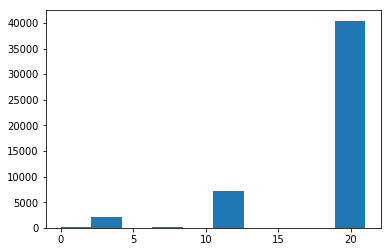

In [119]:
#운동(고정)

plt.hist(listed)

(array([ 9046.,     1.,     1.,     0.,   357.,     1.,     1.,   224.,
            1.,     2.,     1., 21206.,     1.,     8.,     1.,     1.,
            2.,     5.,     1.,     1., 19139.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 21 Patch objects>)

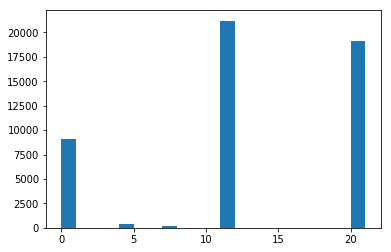

In [34]:
#우울(고정)

plt.hist(listed,bins=21)

(array([10017.,     1.,     1.,     0.,   144.,     1.,     1.,   475.,
            1.,     2.,     1., 26346.,     1.,     8.,     1.,     1.,
            2.,     8.,     1.,     1., 12987.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 21 Patch objects>)

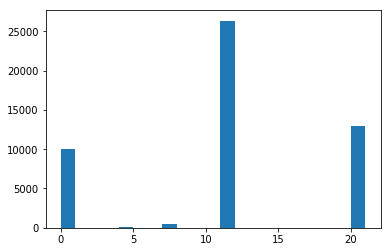

In [32]:
#오늘 맥주좀 추천해줘(고정)
plt.hist(listed,bins=21)